<a href="https://colab.research.google.com/github/Abdulhady-Feteiha/Twitter-emoji-prediction/blob/main/LSTMs_Tweet_emojis_preidction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding,Input,concatenate
#from tensorflow.keras.layers.embeddings import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras.preprocessing.text import one_hot
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import numpy as np
from numpy import array
import pandas as pd
from sklearn.model_selection import train_test_split
import re
# import preprocessor as p
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model
import itertools

Using TensorFlow backend.


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
f = open('/content/gdrive/My Drive/tweetEmojis-dataset/train/us_train.labels',encoding="utf8")
Tr_label =[]
for line in f:
    line = re.sub(r'\D+', '', line)
    Tr_label.append(line)
f.close()



f = open('/content/gdrive/My Drive/tweetEmojis-dataset/us_mapping.txt',encoding="utf8")
emojis =[]
for line in f:
    line = re.sub(r'_',' ', line)
    line = re.sub(r'\t\n','', line)
    emojis.append(line)
f.close()


In [ ]:
dicts = {}
for i in range(len(emojis)):
        dicts[i] = emojis[i]
print(dicts)
print (emojis)

{0: ' red heart ', 1: ' smiling face with hearteyes ', 2: ' face with tears of joy ', 3: ' two hearts ', 4: ' fire ', 5: ' smiling face with smiling eyes ', 6: ' smiling face with sunglasses ', 7: ' sparkles ', 8: ' blue heart ', 9: ' face blowing a kiss ', 10: ' camera ', 11: ' United States ', 12: ' sun ', 13: ' purple heart ', 14: ' winking face ', 15: ' hundred points ', 16: ' beaming face with smiling eyes ', 17: ' Christmas tree ', 18: ' camera with flash ', 19: ' winking face with tongue '}
[' red heart ', ' smiling face with hearteyes ', ' face with tears of joy ', ' two hearts ', ' fire ', ' smiling face with smiling eyes ', ' smiling face with sunglasses ', ' sparkles ', ' blue heart ', ' face blowing a kiss ', ' camera ', ' United States ', ' sun ', ' purple heart ', ' winking face ', ' hundred points ', ' beaming face with smiling eyes ', ' Christmas tree ', ' camera with flash ', ' winking face with tongue ']


In [ ]:
f = open('/content/gdrive/My Drive/tweetEmojis-dataset/train/us_train.text',encoding="utf8")

Tr_Dataset =[]
i=0
train_label = []

for line in f:
    line = re.sub(r'\b\w\b', '', line)
    line = re.sub(r'\d', '', line)
    line = line[:-2]
    train_label.append(dicts[int(Tr_label[i])])
    Tr_Dataset.append(line)
    i = i+1

f.close()



In [ ]:
max = 0
for item in Tr_Dataset:
  if len(item.split()) > max:
    max = len(item.split())
    print(max)
print(max)

5
10
13
14
16
18
19
20
21
23
26
27
30
39
42
42


In [ ]:

count = {}
for w in open('/content/gdrive/My Drive/tweetEmojis-dataset/train/us_train.text').read().split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

print (len(count))


509048


In [ ]:
     
max_length = max ## max number of words in each row
max_features = len(count) # this is the number of words we care about ????????????
del count

In [ ]:
embeddings_index = dict()
f = open('/content/gdrive/My Drive/tweetEmojis-dataset/glove/glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# LSTM method

In [ ]:
emojMax = 0
for item in emojis:

  if len(item.split()) > emojMax:
    emojMax = len(item.split())
print(emojMax)

5


In [ ]:

emojCount = {}
for w in open('/content/gdrive/My Drive/separated_us_mapping.txt').read().split():
    if w in emojCount:
        emojCount[w] += 1
    else:
        emojCount[w] = 1

print (len(emojCount))


31


In [ ]:
emojMax_features = len(emojCount) # this is the number of words we care about ????????????


In [ ]:
# Glove

emojTokenizer = Tokenizer(num_words=emojMax_features, filters='!"#$@%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', split=' ', oov_token='<unw>', lower=True)
emojTokenizer.fit_on_texts(emojis)


    
# this takes our sentences and replaces each word with an integer
emojSeq = emojTokenizer.texts_to_sequences(emojis)


emojSeq = pad_sequences(emojSeq, emojMax)



In [ ]:
X_train, X_vali , y_train, y_vali = train_test_split(X, Tr_label , test_size = 0.2, shuffle = True)
y_train_cat = to_categorical(y_train)
y_vali_cat = to_categorical(y_vali)

In [ ]:
print('Found %s word vectors.' % len(embeddings_index))

word_index = emojTokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

emojNum_words = min(emojMax_features, len(word_index)) + 1
print(emojNum_words)

embedding_dim = 300 #

# first create a matrix of zeros, this is our embedding matrix
emoj_Embedding_matrix = np.zeros((emojNum_words, embedding_dim))
# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > emojMax_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        emoj_Embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        emoj_Embedding_matrix[i] = np.random.randn(embedding_dim)

Found 400000 word vectors.
Found 33 unique tokens.
32


In [ ]:
twtIn = Input((max_length,))
embd = Embedding(num_words, embedding_dim , embeddings_initializer=Constant(embedding_matrix),trainable=True)(twtIn)
Lstm = LSTM(32, activation='relu', recurrent_dropout=0.5)(embd)
dense = Dense(16, activation='relu')(Lstm)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
In1 = Input((emojMax,))
emb1 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In1)
ls1 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb1)
den1 = Dense(32, activation='relu')(ls1)
In2 = Input((emojMax,))
emb2 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In2)
ls2 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb2)
den2 = Dense(32, activation='relu')(ls2)
In3 = Input((emojMax,))
emb3 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In3)
ls3 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb3)
den3 = Dense(32, activation='relu')(ls3)
In4 = Input((emojMax,))
emb4 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In4)
ls4 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb4)
den4 = Dense(32, activation='relu')(ls4)
In5 = Input((emojMax,))
emb5 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In5)
ls5 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb5)
den5 = Dense(32, activation='relu')(ls5)
In6 = Input((emojMax,))
emb6 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In6)
ls6 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb6)
den6 = Dense(32, activation='relu')(ls6)
In7 = Input((emojMax,))
emb7 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In7)
ls7 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb7)
den7 = Dense(32, activation='relu')(ls7)
In8 = Input((emojMax,))
emb8 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In8)
ls8 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb8)
den8 = Dense(32, activation='relu')(ls8)
In9 = Input((emojMax,))
emb9 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In9)
ls9 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb9)
den9 = Dense(32, activation='relu')(ls9)
In10 = Input((emojMax,))
emb10 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In10)
ls10 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb10)
den10 = Dense(32, activation='relu')(ls10)
In11 = Input((emojMax,))
emb11 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In11)
ls11 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb11)
den11 = Dense(32, activation='relu')(ls11)
In12 = Input((emojMax,))
emb12 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In12)
ls12 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb12)
den12 = Dense(32, activation='relu')(ls12)
In13 = Input((emojMax,))
emb13 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In13)
ls13 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb13)
den13 = Dense(32, activation='relu')(ls13)
In14 = Input((emojMax,))
emb14 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In14)
ls14 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb14)
den14 = Dense(32, activation='relu')(ls14)
In15 = Input((emojMax,))
emb15 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In15)
ls15 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb15)
den15 = Dense(32, activation='relu')(ls15)
In16 = Input((emojMax,))
emb16 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In16)
ls16 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb16)
den16 = Dense(32, activation='relu')(ls16)
In17 = Input((emojMax,))
emb17 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In17)
ls17 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb17)
den17 = Dense(32, activation='relu')(ls17)
In18 = Input((emojMax,))
emb18 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In18)
ls18 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb18)
den18 = Dense(32, activation='relu')(ls18)
In19 = Input((emojMax,))
emb19 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In19)
ls19 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb19)
den19 = Dense(32, activation='relu')(ls19)
In20 = Input((emojMax,))
emb20 = Embedding(emojNum_words, embedding_dim , embeddings_initializer=Constant(emoj_Embedding_matrix),trainable=True)(In20)
ls20 = LSTM(8, activation='relu', recurrent_dropout=0.5)(emb20)
den20 = Dense(32, activation='relu')(ls20)


In [ ]:

cont = concatenate([dense,den1,den2,den3,den4,den5,den6,den7,den8,den9,den10,den11,den12,den13,den14,den15,den16,den17,den18,den19,den20])
out = Dense(20, activation='softmax')(cont)
In = [twtIn,In1,In2,In3,In4,In5,In6,In7,In8,In9,In10,In11,In12,In13,In14,In15,In16,In17,In18,In19,In20]
model = Model(inputs=In,outputs=out)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________

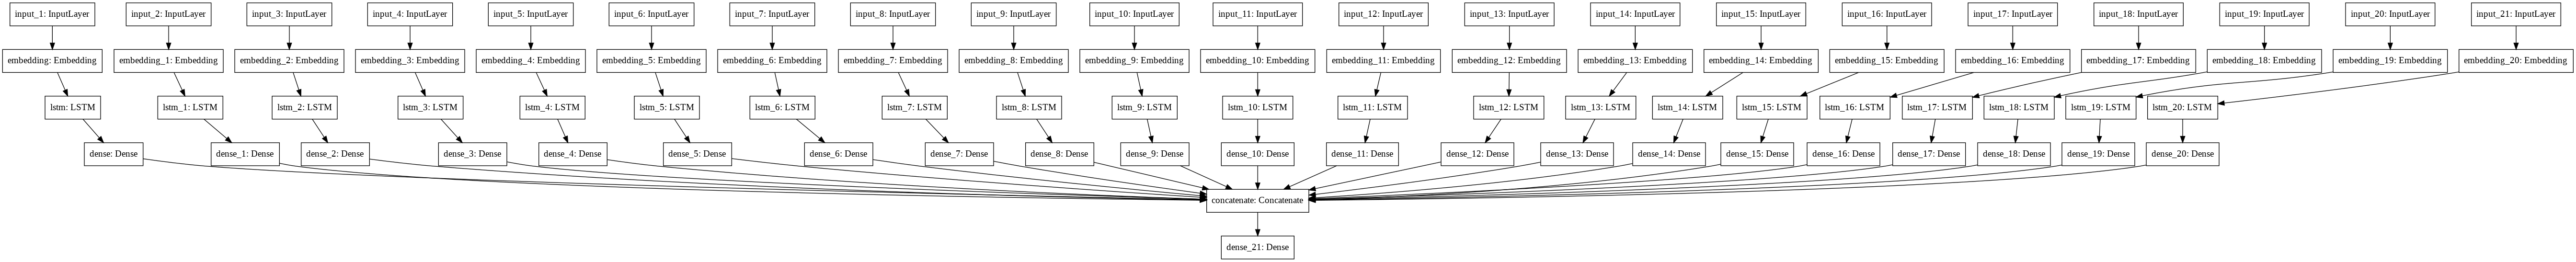

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam' ,metrics = ['acc'])
#categorical_crossentropy
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:

num_tr_copis = len(X_train)
emj_train = [np.asarray(list(itertools.repeat(i, num_tr_copis))) for i in emojSeq]
num_val_copis = len(X_vali)
emj_vali = [np.asarray(list(itertools.repeat(i, num_val_copis))) for i in emojSeq]


#OHE = np.reshape(OHE,(1,num_copis,20))

In [ ]:

batch_size = 200
# es=EarlyStopping(monitor='val_acc', min_delta=0.001, patience=3, verbose=0, mode='max', baseline=None, restore_best_weights=True)
# cp= ModelCheckpoint('/content/gdrive/My Drive/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='max')  
trIn = [X_train,emj_train[0],emj_train[1],emj_train[2],emj_train[3],emj_train[4],emj_train[5],emj_train[6],emj_train[7],emj_train[8],emj_train[9],emj_train[10],emj_train[11],emj_train[12],emj_train[13],emj_train[14],emj_train[15],emj_train[16],emj_train[17],emj_train[18],emj_train[19]]
tstIn = [X_vali,emj_vali[0],emj_vali[1],emj_vali[2],emj_vali[3],emj_vali[4],emj_vali[5],emj_vali[6],emj_vali[7],emj_vali[8],emj_vali[9],emj_vali[10],emj_vali[11],emj_vali[12],emj_vali[13],emj_vali[14],emj_vali[15],emj_vali[16],emj_vali[17],emj_vali[18],emj_vali[19]]

history = model.fit(trIn, y_train_cat, epochs=3, batch_size=batch_size, verbose=1,  validation_data=(tstIn,y_vali_cat))

# One Hot method

In [ ]:
int_emojis = list(range(20))
OHE = to_categorical(int_emojis)


In [ ]:

X_train, X_vali , y_train, y_vali = train_test_split(X, Tr_label , test_size = 0.2, shuffle = True)
y_train_cat = to_categorical(y_train)
y_vali_cat = to_categorical(y_vali)



In [ ]:
print('Found %s word vectors.' % len(embeddings_index))

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 300 #

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))
# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
model = Sequential()
model.add(Embedding(num_words, embedding_dim , embeddings_initializer=Constant(embedding_matrix),input_length=max_length, trainable=True))
model.add(LSTM(50, activation='relu', recurrent_dropout=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
print("Model is built")

In [ ]:
twtIn = Input((max_length,))
embd = Embedding(num_words, embedding_dim , embeddings_initializer=Constant(embedding_matrix),trainable=True)(twtIn)
Lstm = LSTM(32, activation='relu', recurrent_dropout=0.5)(embd)
dense = Dense(16, activation='relu')(Lstm)

In [ ]:
In1 = Input((20,))
In2= Input((20,))
In3 = Input((20,))
In4 = Input((20,))
In5 = Input((20,))
In6 = Input((20,))
In7 = Input((20,))
In8 = Input((20,))
In9 = Input((20,))
In10 = Input((20,))
In11 = Input((20,))
In12 = Input((20,))
In13 = Input((20,))
In14 = Input((20,))
In15 = Input((20,))
In16 = Input((20,))
In17 = Input((20,))
In18 = Input((20,))
In19 = Input((20,))
In20 = Input((20,))


In [ ]:

cont = concatenate([dense,In1,In2,In3,In4,In5,In6,In7,In8,In9,In10,In11,In12,In13,In14,In15,In16,In17,In18,In19,In20])
out = Dense(20, activation='softmax')(cont)
In = [twtIn,In1,In2,In3,In4,In5,In6,In7,In8,In9,In10,In11,In12,In13,In14,In15,In16,In17,In18,In19,In20]
model = Model(inputs=In,outputs=out)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam' ,metrics = ['acc'])
#categorical_crossentropy
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:

OHE_ = to_categorical(int_emojis)
num_tr_copis = len(X_train)
OHE = [np.asarray(list(itertools.repeat(i, num_tr_copis))) for i in OHE]
num_val_copis = len(X_vali)
OHE_val = [np.asarray(list(itertools.repeat(i, num_val_copis))) for i in OHE]


#OHE = np.reshape(OHE,(1,num_copis,20))

In [ ]:

batch_size = 200
# es=EarlyStopping(monitor='val_acc', min_delta=0.001, patience=3, verbose=0, mode='max', baseline=None, restore_best_weights=True)
# cp= ModelCheckpoint('/content/gdrive/My Drive/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='max')  
trIn = [X_train,OHE[0],OHE[1],OHE[2],OHE[3],OHE[4],OHE[5],OHE[6],OHE[7],OHE[8],OHE[9],OHE[10],OHE[11],OHE[12],OHE[13],OHE[14],OHE[15],OHE[16],OHE[17],OHE[18],OHE[19]]
tstIn = [X_vali,OHE_val[0],OHE_val[1],OHE_val[2],OHE_val[3],OHE_val[4],OHE_val[5],OHE_val[6],OHE_val[7],OHE_val[8],OHE_val[9],OHE_val[10],OHE_val[11],OHE_val[12],OHE_val[13],OHE_val[14],OHE_val[15],OHE_val[16],OHE_val[17],OHE_val[18],OHE_val[19]]

history = model.fit(trIn, y_train_cat, epochs=3, batch_size=batch_size, verbose=1,  validation_data=(tstIn,y_vali_cat))

In [ ]:
y_train_cat.shape

In [ ]:
np.asarray(OHE).shape

In [ ]:
f = open('/content/gdrive/My Drive/tweetEmojis-dataset/test/us_test.labels',encoding="utf8")
Ts_label =[]
for line in f:
    line = re.sub(r'\D+', '', line)
    Ts_label.append(line)
f.close()
print(Ts_label[0])



In [ ]:
f = open('/content/gdrive/My Drive/tweetEmojis-dataset/test/us_test.text',encoding="utf8")
Ts_Dataset =[]
test_label = []
i=0


for line in f:
    line = re.sub(r'\b\w\b', '', line)
    line = re.sub(r'\d', '', line)
    line = line[:-2]
    for n in range(20):
        test_label.append(dicts[int(Ts_label[i])])
        Ts_Dataset.append(line)
        
    i = i+1

f.close()


print(Ts_Dataset[0])
print(test_label[0])

In [ ]:
print(Ts_Dataset[:20])
print(Ts_emoji_Dataset[:20])
print(test_label[:20])
print(Ts_emoji_Dataset[2])

In [ ]:
count = {}
for w in open('/content/gdrive/My Drive/tweetEmojis-dataset/test/us_test.text').read().split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

print (len(count))

max_features = len(count)


In [ ]:
# Glove

tokenizer = Tokenizer(num_words=max_features, filters='!"#$@%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', split=' ', oov_token='<unw>', lower=True)
tokenizer.fit_on_texts(Ts_Dataset)
    
# this takes our sentences and replaces each word with an integer
Y = tokenizer.texts_to_sequences(Ts_Dataset)
print(Ts_Dataset[1])

Y = pad_sequences(Y, max_length)
print(Y[0])

test_cat = to_categorical(Ts_label)

del Ts_Dataset
del tokenizer

In [ ]:

score = model.evaluate(Y, test_cat)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

y_pred = model.predict(Y)
y_pred1 = np.argmax(y_pred, axis=1)
y_pred_cat=to_categorical(y_pred1,num_classes=20)
print("precision: ",precision_score(test_cat, y_pred_cat , average='macro'))
print("recall: ", recall_score(test_cat, y_pred_cat , average='macro'))
print("f1: ", f1_score(test_cat, y_pred_cat , average='macro'))


In [ ]:
y_pred = model.predict(X_vali)
y_pred1 = np.argmax(y_pred, axis=1)
y_pred_cat=to_categorical(y_pred1,num_classes=20)
print("precision: ",precision_score(y_vali_cat, y_pred_cat , average='macro'))
print("recall: ", recall_score(y_vali_cat, y_pred_cat , average='macro'))
print("f1: ", f1_score(y_vali_cat, y_pred_cat , average='macro'))